In [7]:
# import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Renewable_energy_dataset.csv")
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [8]:
# data cleaning and preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [9]:
# change words that contain typing errors
df['Sector'] = df['Sector'].replace('Commerical','Commercial')

In [10]:
# check duplicate value
df.duplicated().sum()

0

In [11]:
# check null value
df.isna().sum()

Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64

### **1. Pola grafik total penggunaan energi berdasarkan sumber energi di setiap tahunnya**

In [12]:
# calculate the total energy consumption by energy types over the year
year_on_year = df.groupby('Year')[df.select_dtypes(include='float').columns].sum().reset_index()
year_on_year.head()

,Year,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,11.420,6.709,0.0,0.0,1527.016,2.055,0.0,0.0,1174.972,2475.547,0.0,0.0,928.347,0.0
1,1974,10.850,8.368,0.0,0.0,1537.761,1.902,0.0,0.0,1168.709,2586.002,0.0,0.0,1027.120,0.0
2,1975,10.597,11.077,0.0,0.0,1496.929,1.806,0.0,0.0,1073.324,2544.167,0.0,0.0,1023.758,0.0
3,1976,10.977,12.340,0.0,0.0,1711.487,1.889,0.0,0.0,1231.743,2704.699,0.0,0.0,968.010,0.0
4,1977,10.658,12.223,0.0,0.0,1836.521,1.808,0.0,0.0,1296.550,2613.470,0.0,0.0,752.259,0.0


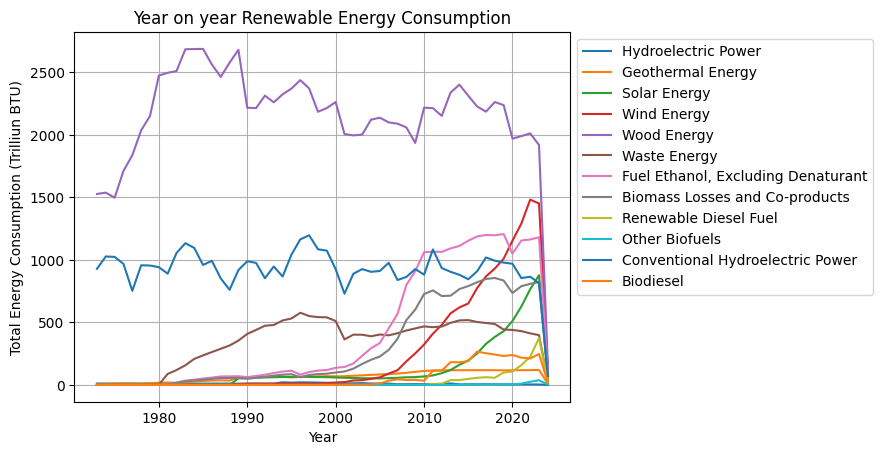

In [13]:
# drop the column that unnecessary based on this problem
energy_types = year_on_year.drop(columns=['Year','Biomass Energy','Total Renewable Energy']).columns

# make a loop to iterate every column for visualization
for energy in energy_types:
    plt.plot(year_on_year['Year'], year_on_year[energy], label= energy)

plt.title('Year on year Renewable Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (Trilliun BTU)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

Berdasarkan grafik tersebut, dapat terlihat bahwa total energi terbarukan yang **paling sering digunakan** dari tahun ke tahun adalah energi yang bersumber dari **kayu** ***(wood energy)***. Konsumsi dari energi kayu mengalami tren yang **cukup konstan**, terutama dalam **20 tahun belakangan**. Akan tetapi, **terjadi kenaikan** konsumsi energi kayu yang cukup signifikan dalam **10 hingga 15 tahun pertama**, sebelum akhirnya mengalami penurunan lalu diikuti dengan fluktuasi yang cukup stabil hingga tahun 2024.

Selain itu, dari semua jenis energi terbarukan yang ada hanya **satu sumber energi** yang memiliki total konsumsi **stabil dan konstan**, yaitu energi yang bersumber dari **pembangkit listrik tenaga air konvensional**. Tren dari data menunjukkan bahwa **grafik konsumsi** dari energi ini **terbilang stabil**, sehingga tidak mengalami kenaikan maupun penurunan yang berarti. Ini menandakan bahwa energi tersebut dapat dikatakan menjadi **salah satu primadona** bagi sektor - sektor yang ada dalam memanfaatkannya sebagai sumber energi dari tahun ke tahun selain energi kayu.

Kemudian, ada **dua sumber energi** yang paling **kurang diminati** dari tahun ke tahun, yaitu energi yang bersumber dari **pembangkit listrik tenaga air** dan energi biofuel yang lain ***(Other biofuel)***. Sebaliknya, **sisa tipe energi** yang ada mengalami **lonjakan konsumsi** yang cukup tinggi dalam **20 tahun terakhir**. Hal ini dibuktikan dari **grafik** yang bergerak secara **eksponensial**. Tipe energi yang dimaksud di antaranya yaitu **energi angin** di posisi **pertama**, energi **ethanol** di posisi **kedua**, **sisa energi biomassa** dan produk turunannya di urutan **ketiga**, energi **matahari** di posisi **keempat**, energi **sampah/limbah** di posisi **kelima**, bahan bakar **diesel terbarukan** di posisi **keenam**, dan yang **terakhir** yaitu energi **biodiesel dan panas bumi**.

### **2. Pola grafik total penggunaan energi berdasarkan sektor di setiap tahunnya**

In [14]:
df2 = df.drop(columns=['Year','Month'])
energy_by_sector = df2.groupby('Sector')[df2.select_dtypes(include='float').columns].sum().reset_index()
energy_by_sector

,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,Commercial,13.409,450.646,446.318,5.802,2868.583,1444.467,279.609,0.000,4592.659,5509.491,0.000,0.000,0.000,0.000
1,Electric Power,0.000,2132.048,2765.146,13114.608,6083.807,8873.151,0.000,0.000,14956.952,81265.086,0.000,0.000,48296.351,0.000
2,Industrial,506.902,132.217,111.765,5.159,74538.427,7521.062,339.035,14818.375,97216.902,97972.964,0.000,0.000,0.000,0.000
3,Residential,0.000,798.711,2852.771,0.000,28824.295,0.000,0.000,0.000,0.000,32475.780,0.000,0.000,0.000,0.000
4,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,20764.782,0.000,25099.983,0.000,1314.728,97.321,0.000,2923.152


In [15]:
filter_data = energy_by_sector.drop(columns=['Biomass Energy','Total Renewable Energy'])
total_energy = filter_data.drop(columns=['Sector']).sum(axis=1)

filter_data['Total_Energy_Consume'] = total_energy
total_energy_by_sector = filter_data[['Sector','Total_Energy_Consume']]
total_energy_by_sector

,Sector,Total_Energy_Consume
0,Commercial,5508.834
1,Electric Power,81265.111
2,Industrial,97972.942
3,Residential,32475.777
4,Transportation,25099.983


In [16]:
total_energy_by_sector['Total_Energy_Consume'].values

array([ 5508.834, 81265.111, 97972.942, 32475.777, 25099.983])

Text(0, 0.5, 'Sector')

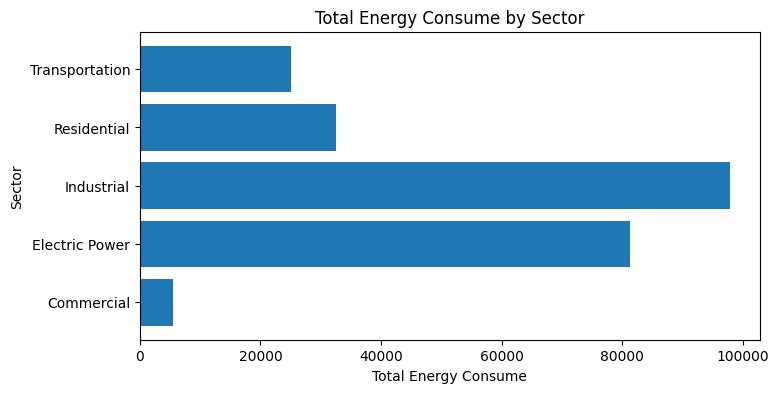

In [17]:
plt.figure(figsize=(8,4))
plt.barh(total_energy_by_sector['Sector'], total_energy_by_sector['Total_Energy_Consume'])
plt.title('Total Energy Consume by Sector')
plt.xlabel('Total Energy Consume')
plt.ylabel('Sector')

Berdasarkan grafik tersebut, dapat diketahui bahwa sektor yang paling banyak menggunakan energi terbarukan adalah sektor industri dengan total energi hingga 98 ribu, diikuti dengan sektor pembangkit listrik di posisi kedua dengan total konsumsi sebesar 81 ribu, sektor perumahan di posisi ketiga dengan total konsumsi sebesar 32 ribu, sektor transportasi di posisi keempat dengan total energi sebesar 25 ribu, dan di posisi terakhir yaitu sektor komersial dengan total konsumsi energi sebesar 5500.

### **3. Bagaimana korelasi antara sektor dan sumber energi terbarukan yang selama ini digunakan di setiap tahunnya?**

In [18]:
df['Sector'].unique()

array(['Commercial', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

In [19]:
# make a dummies variable so that the sector column can be use to calculate the correlation
df_encode = pd.get_dummies(df, columns=['Sector'], drop_first=False)
correlation_matrix = df_encode.drop(columns=['Year','Month','Biomass Energy', 'Total Renewable Energy']).corr()

In [20]:
correlation_matrix

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Sector_Commercial,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation
Hydroelectric Power,1.000000,-0.271442,-0.149577,-0.107242,0.815689,0.346844,-0.137173,0.288952,-0.072496,-0.055875,-0.222757,-0.108719,-0.197834,-0.227097,0.879125,-0.227097,-0.227097
Geothermal Energy,-0.271442,1.000000,0.464861,0.505556,-0.233729,0.542138,-0.229936,-0.161017,-0.118003,-0.090950,0.730018,-0.176965,-0.132600,0.751864,-0.300103,0.050492,-0.369652
Solar Energy,-0.149577,0.464861,1.000000,0.744309,-0.064180,0.128118,-0.108345,-0.081408,-0.055706,-0.042935,0.196049,-0.083540,-0.111449,0.216143,-0.158713,0.228522,-0.174503
Wind Energy,-0.107242,0.505556,0.744309,1.000000,-0.100915,0.403715,-0.075237,-0.072848,-0.037719,-0.029071,0.444992,-0.056565,-0.117895,0.472130,-0.117924,-0.118156,-0.118156
Wood Energy,0.815689,-0.233729,-0.064180,-0.100915,1.000000,0.358814,-0.235582,0.538292,-0.124730,-0.096134,-0.280909,-0.187052,-0.340827,-0.284901,0.905804,0.110649,-0.390724
Waste Energy,0.346844,0.542138,0.128118,0.403715,0.358814,1.000000,-0.214251,0.303493,-0.112657,-0.086829,0.518679,-0.168947,-0.210025,0.524789,0.391046,-0.352905,-0.352905
"Fuel Ethanol, Excluding Denaturant",-0.137173,-0.229936,-0.108345,-0.075237,-0.235582,-0.214251,1.000000,-0.080803,0.628210,0.484820,-0.156180,0.912225,-0.148814,-0.159224,-0.146601,-0.159224,0.613862
Biomass Losses and Co-products,0.288952,-0.161017,-0.081408,-0.072848,0.538292,0.303493,-0.080803,1.000000,-0.049470,-0.038128,-0.152005,-0.074188,-0.154967,-0.154967,0.619867,-0.154967,-0.154967
Renewable Diesel Fuel,-0.072496,-0.118003,-0.055706,-0.037719,-0.124730,-0.112657,0.628210,-0.049470,1.000000,0.943786,-0.078282,0.736192,-0.079807,-0.079807,-0.079807,-0.079807,0.319228
Other Biofuels,-0.055875,-0.090950,-0.042935,-0.029071,-0.096134,-0.086829,0.484820,-0.038128,0.943786,1.000000,-0.060335,0.573188,-0.061510,-0.061510,-0.061510,-0.061510,0.246041


<Figure size 2000x1000 with 0 Axes>

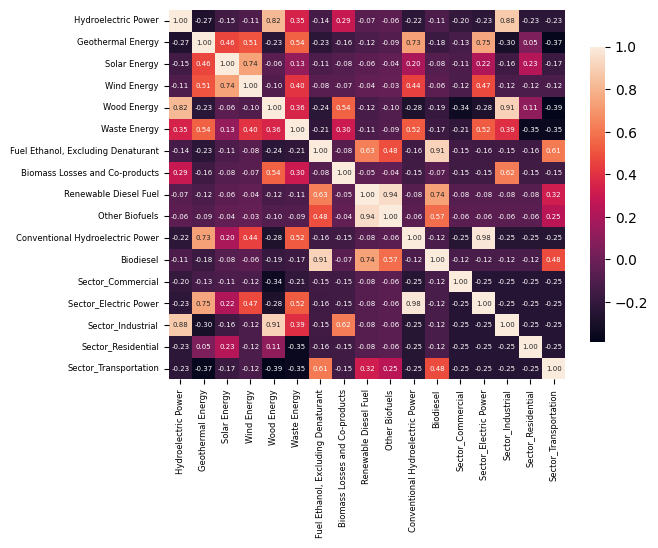

<Figure size 2000x1000 with 0 Axes>

In [21]:
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
                      cmap='rocket', annot_kws={'size': 5}, cbar_kws={'shrink': 0.8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=6)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6)
plt.figure(figsize=(20,10))

In [22]:
correlation_matrix_filtered = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
correlation_matrix_filtered

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel,Sector_Commercial,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation
Hydroelectric Power,1.000000,NaN,NaN,NaN,0.815689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.879125,NaN,NaN
Geothermal Energy,NaN,1.000000,NaN,0.505556,NaN,0.542138,NaN,NaN,NaN,NaN,0.730018,NaN,NaN,0.751864,NaN,NaN,NaN
Solar Energy,NaN,NaN,1.000000,0.744309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind Energy,NaN,0.505556,0.744309,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wood Energy,0.815689,NaN,NaN,NaN,1.000000,NaN,NaN,0.538292,NaN,NaN,NaN,NaN,NaN,NaN,0.905804,NaN,NaN
Waste Energy,NaN,0.542138,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.518679,NaN,NaN,0.524789,NaN,NaN,NaN
"Fuel Ethanol, Excluding Denaturant",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.628210,NaN,NaN,0.912225,NaN,NaN,NaN,NaN,0.613862
Biomass Losses and Co-products,NaN,NaN,NaN,NaN,0.538292,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.619867,NaN,NaN
Renewable Diesel Fuel,NaN,NaN,NaN,NaN,NaN,NaN,0.628210,NaN,1.000000,0.943786,NaN,0.736192,NaN,NaN,NaN,NaN,NaN
Other Biofuels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.943786,1.000000,NaN,0.573188,NaN,NaN,NaN,NaN,NaN


<Figure size 2000x1000 with 0 Axes>

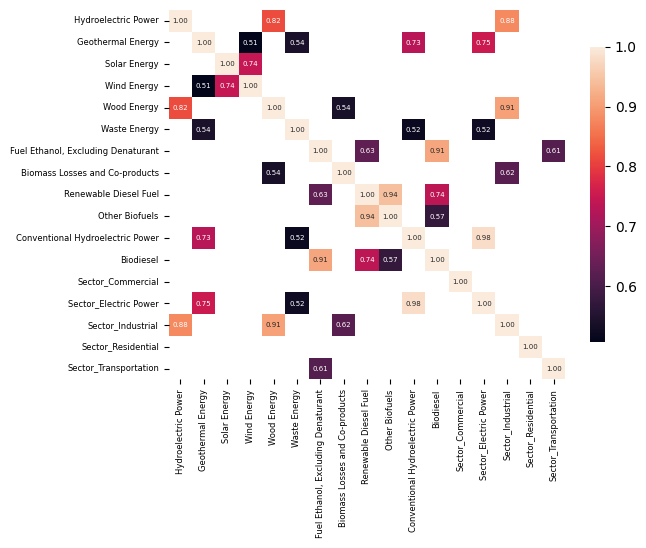

<Figure size 2000x1000 with 0 Axes>

In [23]:
heatmap = sns.heatmap(correlation_matrix_filtered, annot=True, fmt='.2f',
                      cmap='rocket', annot_kws={'size': 5}, cbar_kws={'shrink': 0.8})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=6)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=6)
plt.figure(figsize=(20,10))

Berdasarkan gambar di atas, dapat diketahui bahwa ada cukup banyak variabel yang berkorelasi antar satu dan lainnya. Korelasi tersebut ternyata bukan hanya terjadi antara sektor dan sumber energi, tapi juga antar sumber energi yang ada.

**Korelasi Antara Sektor dan Sumber Energi**

- Sektor komersial **tidak memiliki keterkaitan** apapun dengan sumber energi yang ada. Hal ini menandakan sektor komersial memiliki **sumber energi maupun variabel lain** yang dapat **mempengaruhi pertumbuhannya** secara langsung.

- Sektor Pembangkit listrik memiliki keterkaitan yang erat dengan **energi panas bumi, energi limbah, dan pembangkit listrik tenaga air konvensional**. Hal ini menandakan bahwa **ketiga sumber energi** tersebut **berpengaruh besar** dalam menggerakkan sektor pembangkit listrik dari tahun ke tahun, dan begitu pula sebaliknya.

- Sektor industri memiliki keterkaitan yang kuat dengan **pembangkit listrik tenaga air, energi kayu, dan energi biomassa serta produk turunannya**. Hal ini menandakan bahwa **ketiga energi** tersebut **berpengaruh besar** terhadap **pertumbuhan** dari **sektor industri** setiap tahunnya.

- Sektor perumahan **tidak memiliki keterkaitan** apapun dengan sumber energi yang ada. Sama halnya dengan sektor komersial, kemungkinan yang dapat terjadi adalah **pertumbuhan sektor perumahan dipengaruhi oleh variabel lainnya**.

- Sektor **transportasi** memiliki **keterkaitan erat** dengan sumber energi yang berasal dari **bahan bakar ethanol**. Tak sama seperti sektor lainnya, **sektor transportasi** hanya dipengaruhi oleh bahan bakar ethanol sebagai sumber **energi paling primadona** di setiap tahunnya.

**Korelasi Antar Sumber Energi yang Digunakan**

- Pembangkit listrik tenaga air memiliki keterkaitan erat dengan energi kayu secara positif. Hal ini menandakan bahwa setiap bertambahnya energi pembangkit listrik tenaga air, semakin bertambah pula energi yang bersumber dari kayu, dan begitu pula sebaliknya.

- Energi panas bumi memiliki korelasi positif yang kuat terhadap tiga sumber energi lainnya yaitu energi angin, energi limbah/sampah, dan pembangkit listrik tenaga air konvensional. Hal ini menandakan bahwa semakin bertambahnya energi panas bumi, semakin bertambah pula energi yang bersumber dari angin, limbah, serta plta konvensional dan begitu pula sebaliknya.

- Energi surya memiliki korelasi kuat secara positif terhadap sumber energi lainnya yaitu energi angin. Hal ini menandakan bahwa setiap bertambahnya energi surya, semakin bertambah pula energi yang bersumber dari angin dan begitu pula sebaliknya.

- Selain pembangkit listrik tenaga air, energi kayu juga berkolerasi secara positif dengan sisa energi biomassa dan produk turunannya. Hal ini menandakan bahwa setiap bertambahnya energi kayu, maka akan bertambah pula sisa energi dari biomassa dan produk turunannya, begitu pula sebaliknya. Hal ini wajar saja terjadi mengingat energi kayu merupakan salah satu energi biomassa.

- Energi yang bersumber dari limbah/sampah berkolerasi kuat dan positif dengan energi yang bersumber dari pembangkit listrik tenaga air konvensional serta energi panas bumi. Hal ini menandakan bahwa setiap bertambahnya konsumsi akan energi limbah, maka konsumsi akan energi plta konvensional dan panas bumi juga akan meningkat.

- Bahan bakar etanol berkorelasi secara positif dan erat dengan bahan bakar diesel terbarukan serta biodiesel. Hal ini menandakan bahwa setiap pertumbuhan dari konsumsi bahan bakar etanol, maka akan mempengaruhi pertumbuhan dari bahan bakar diesel terbarukan dan biodiesel.

- Sisa energi biomassa dan produk turunannya memiliki korelasi kuat dan positif terhadap energi kayu. Hal ini menandakan bahwa semakin besar penggunaan dari energi kayu, maka semakin besar pula sisa energi biomassa yang dihasilkan, karena kayu merupakan salah satu energi yang termasuk biomassa.

- Bahan bakar diesel terbarukan memiliki korelasi kuat dan positif terhadap bahan bakar ethanol, energi biofuel lainnya, dan biodiesel. Hal ini menandakan bahwa setiap bertambahnya bahan bakar diesel terbarukan, ketiga energi yang berkorelasi kuat dengannya akan ikut bertambah, dan begitu pula sebaliknya.

- Energi biofuel lainnya memiliki korelasi kuat dan positif terhadap bahan bakar diesel terbarukan dan biodiesel. Hal ini menandakan bahwa semakin bertambahnya penggunaan dari energi biofuel, maka penggunaan dari bahan bakar diesel terbarukan dan biodiesel juga akan semakin meningkat.

- Pembangkit listrik tenaga air konvensional berkorelasi secara erat dan positif terhadap energi panas bumi dan energi limbah. Hal ini menandakan bahwa setiap peningkatan yang terjadi pada pembangkit listrik tenaga air konvensional, maka akan mempengaruhi peningkatan dari energi panas bumi dan energi limbah itu sendiri.

- Energi biodiesel memiliki korelasi erat dan positif terhadap bahan bakar ethanol, bahan bakar diesel terbarukan, dan energi biofuel lainnya. Hal ini menandakan bahwa setiap peningkatan pada sumber energi biodiesel, maka ketiga energi tersebut otomatis juga akan mengalami peningkatan.

### **4. Sumber energi apa yang paling banyak digunakan berdasarkan sektor?**

In [24]:
energy_sector_cons = energy_by_sector.drop(columns=['Biomass Energy','Total Renewable Energy'])
energy_sector_cons

,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,Commercial,13.409,450.646,446.318,5.802,2868.583,1444.467,279.609,0.000,0.000,0.000,0.000,0.000
1,Electric Power,0.000,2132.048,2765.146,13114.608,6083.807,8873.151,0.000,0.000,0.000,0.000,48296.351,0.000
2,Industrial,506.902,132.217,111.765,5.159,74538.427,7521.062,339.035,14818.375,0.000,0.000,0.000,0.000
3,Residential,0.000,798.711,2852.771,0.000,28824.295,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Transportation,0.000,0.000,0.000,0.000,0.000,0.000,20764.782,0.000,1314.728,97.321,0.000,2923.152


In [25]:
# Melt the DataFrame to have 'Sector' as the categorical variable and float-type columns as values
melted_df = energy_sector_cons.melt(id_vars='Sector',
                                    value_vars=energy_sector_cons.select_dtypes(include='float').columns)

change_name = melted_df.set_axis(['Sector','Energy Type', 'Energy Consume (Triliun BTU)'], axis='columns')

fig = px.bar(change_name, x='Sector', y='Energy Consume (Triliun BTU)', color='Energy Type')

fig.show()

c:\Users\unknown\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Berdasarkan grafik tersebut, dapat diketahui bahwa energi yang bersumber dari kayu merupakan sumber energi yang paling banyak digunakan setiap tahunnya di tiga sektor yang berbeda yaitu sektor industri, perumahan, dan komersil. Sedangkan sektor pembangkit listrik didominasi oleh pembangkit listrik tenaga air konvensional, dan sektor transportasi didominasi oleh bahan bakar ethanol.

Hal ini wajar saja terjadi mengingat sektor pembangkit listrik dan transportasi secara umum memang jarang menggunakan kayu sebagai sumber energi alternatif. Pembangkit listrik secara dominan lebih memilih pembangkit listrik tenaga air konvensional sebagai sumber energi utama karena itu adalah yang paling sesuai bagi keberlangsungan sektor mereka kedepannya. Hal ini juga berlaku pada sektor transportasi dimana bahan bakar ethanol adalah sumber energi yang paling sesuai bagi sektor mereka. 

### **5. Bagaimana pola grafik total penggunaan sumber energi berdasarkan sektor di setiap tahunnya?**

In [26]:
df_copy = df.drop(columns=['Month','Biomass Energy','Total Renewable Energy'])

In [27]:
energy_column = df_copy.select_dtypes(include='float').columns

df_copy['Total_Energy'] = df_copy[energy_column].sum(axis=1)

# Group by 'Sector' and 'Year', summing up 'Total_Energy'
sector_energy = df_copy.groupby(['Sector', 'Year'])['Total_Energy'].sum().reset_index()

# Pivot the table to have sectors as columns
total_energy = sector_energy.pivot_table(index='Year', columns='Sector', values='Total_Energy').reset_index()

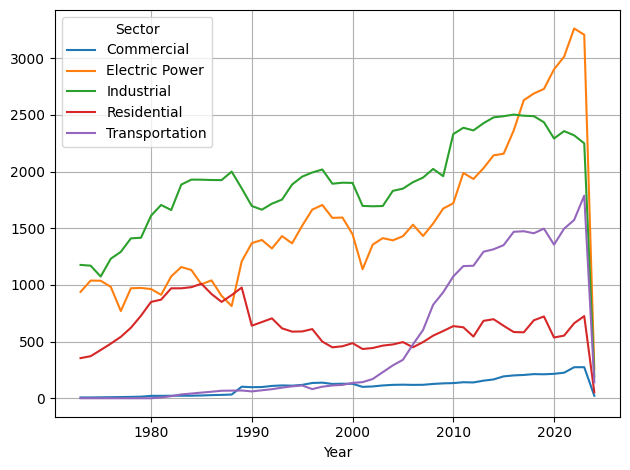

In [28]:
total_energy.plot(x='Year', y=['Commercial', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], kind='line', xlabel='Year')
plt.tight_layout()
plt.grid(True)

Berdasarkan grafik tersebut, dapat diketahui bahwa **pola grafik** penggunaan sumber energi berdasarkan sektor secara dominan mengalami **fluktuasi yang cukup tinggi**, namun **diikuti** oleh **pola grafik yang bergerak ke atas bahkan tumbuh secara eksponensial**. Akan tetapi, dua sektor lainnya justru mengalami pertumbuhan yang konstan bahkan mengalami penurunan. **Penurunan** terjadi **pada sektor perumahan** yaitu **sejak tahun 1989 hingga 2000**, namun di tahun berikutnya grafik mulai mengalami pergerakan yang fluktuatif namun tetap konstan. Sedangkan sektor komersil justru mengalami pertumbuhan yang rendah namun sangat stabil dengan fluktuasi yang sangat minim.

Selain itu, berdasarkan hasil analisa yang dilakukan sebelumnya, sektor industri merupakan sektor yang paling banyak menggunakan energi terbarukan sebagai sumber energi dibandingkan sektor lainnya. Tetapi, yang menarik adalah jika dilihat dalam bentuk pola grafik di setiap tahunnya, sejak tahun 2018 pertumbuhan dari sektor pembangkit listrik justru melampaui sektor industri dalam hal penggunaan energi terbarukan. Hal ini menandakan bahwa dalam waktu dekat ada kemungkinan bahwa sektor pembangkit listrik dapat melampaui sektor industri sebagai sektor dengan penggunaan energi terbarukan tertinggi.